In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import cufflinks as cf
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [38]:
reviews_data = pd.read_json(r"C:\Users\user\Documents\UoM\Thesis\data\Clothing_Shoes_and_Jewelry_5.json", lines=True)


# Drop the products whose values are null
reviews_data = reviews_data[reviews_data['reviewText'].notna()]

ratings = []
for index,entry in enumerate(reviews_data['overall']):
    if entry == 1.0 or entry == 2.0:
        ratings.append(-1)
    elif entry == 3.0:
        ratings.append(0)
    elif entry == 4.0 or entry == 5.0:
        ratings.append(1)

# Keep only the review text and the grade
reviews_data = reviews_data[['reviewText']]
reviews_data['rating'] = ratings

In [39]:
reviews_data.head()

,reviewText,rating
0,This is a great tutu and at a really great pri...,1
1,I bought this for my 4 yr old daughter for dan...,1
2,What can I say... my daughters have it in oran...,1
3,"We bought several tutus at once, and they are ...",1
4,Thank you Halo Heaven great product for Little...,1


In [99]:
def plot_ngram_histogram_word_frequency(data, title, ngram=1, remove_stopwords=False, n=20):
    if remove_stopwords:
        vec = CountVectorizer(ngram_range=(ngram,ngram), stop_words = 'english').fit(data)
    else:
        vec = CountVectorizer(ngram_range=(ngram,ngram)).fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    df1 = pd.DataFrame(words_freq[:n], columns=['word', 'frequency'])
    df1.groupby('word').sum()['frequency'].sort_values(ascending=False).iplot(
        kind='bar', yTitle='Count', linecolor='black', title=title)

In [100]:
# plot most frequent words
plot_ngram_histogram_word_frequency(reviews_data['reviewText'], title="Top 20 words before removing stopwords")

In [101]:
# plot most frequent words after removing stopwords
plot_ngram_histogram_word_frequency(reviews_data['reviewText'], title="Top 20 words after removing stopwords", remove_stopwords=True,
                             n=20)

In [102]:
# plot most frequent bi-grams
plot_ngram_histogram_word_frequency(reviews_data['reviewText'], title="Top 20 bi-grams before removing stopwords",
                             ngram=2)

In [103]:
# plot most frequent bi-grams after removing stopwords
plot_ngram_histogram_word_frequency(reviews_data['reviewText'], title="Top 20 bi-grams after removing stopwords",
                             ngram=2, remove_stopwords=True)

In [104]:
# plot most frequent tri-grams
plot_ngram_histogram_word_frequency(reviews_data['reviewText'], title="Top 20 tri-grams before removing stopwords",
                             ngram=3)

In [105]:
# plot most frequent tri-grams
plot_ngram_histogram_word_frequency(reviews_data['reviewText'], title="Top 20 tri-grams after removing stopwords",
                             ngram=3, remove_stopwords=True)

In [114]:
def plot_most_common_part_of_speach_barchart(text, part_of_speach='JJ'):
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(20))))
    sns.barplot(x=y,y=x).set_title("Most Common Adjectives")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


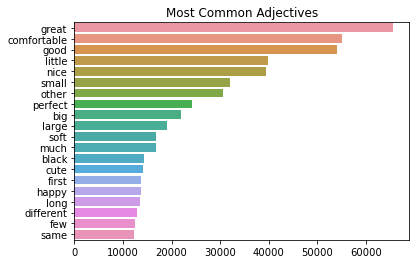

In [115]:
plot_most_common_part_of_speach_barchart(reviews_data['reviewText'])